In [29]:
import matplotlib.pyplot as plt 
import numpy as np
import random 
from keras.utils import to_categorical


from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
# metrics 
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD


In [30]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)


X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


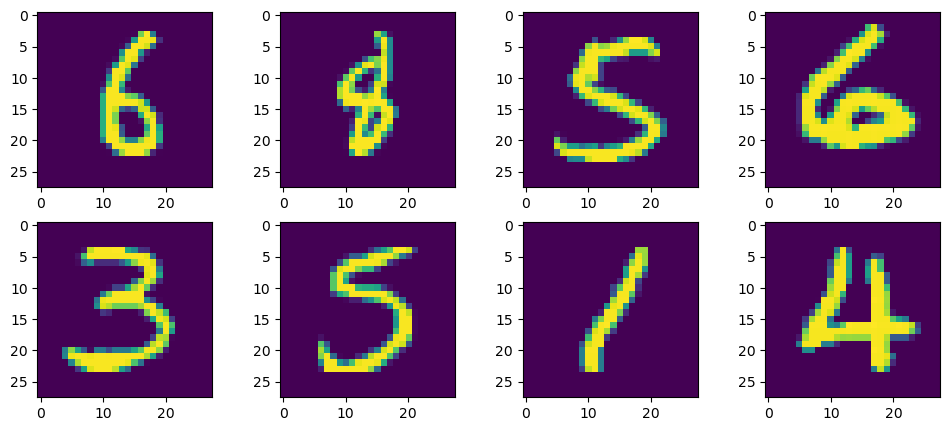

In [32]:
# visualize some data
plt.figure(figsize = (12,5))
for i in range(8):
    ind = random.randint(0, len(X_train))
    plt.subplot(240+1+i)
    plt.imshow(X_train[ind])

In [33]:
def preprocess_data(X_train, y_train, X_test, y_test):
    # reshape images to the the required size by Keras
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
    # convert from integers to floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    # normalize to range 0-1
    X_train = X_train/255.0
    X_test_norm = X_test/255.0
    # One-hot encoding label 
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test 


In [47]:
def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
    # Rescaling all training and testing data
    X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
    # Fitting the model
    history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, steps_per_epoch = X_train.shape[0]//batch_size, validation_data = (X_test, y_test), validation_steps = X_test.shape[0]//batch_size, verbose = 1)
    # evaluate the model
    _, acc = model.evaluate(X_test, y_test, verbose = 1)
    print('%.3f' % (acc * 100.0))
    summary_history(history)

In [35]:
def summary_history(history):
    plt.figure(figsize = (10,6))
    plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
    plt.legend()
    plt.title('Accuracy')
    plt.show()
    
    plt.plot(history.history['loss'],color = 'blue', label = 'train')
    plt.plot(history.history['val_loss'], color = 'red', label = 'val')
    plt.title('Loss')
    plt.legend()
    plt.show()

In [39]:
def example(model):
    # all categories
    cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    plt.figure(figsize = (12,7))
    for i in np.arange(8):
        ind = random.randint(0,len(X_test))
        img = X_test[ind]
        img = img.reshape(1,28,28,1)
        img = img.astype('float32')
        img = img/255.0
        v_p = (model.predict(img)> 0.5).astype("int32")
        for m in v_p:
            for x in range(len(m)):
                if m[x] == 1:
                    j = x   
        plt.subplot(240+1+i)
        plt.imshow(X_test[ind])
        plt.title(j)

LeNet5

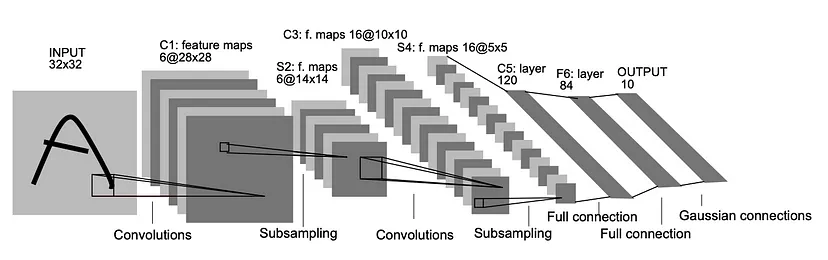

In [36]:
def LeNet():
    model = Sequential()
    model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    # compile the model with a loss function, a metric and an optimizer function
    opt = SGD(lr = 0.01)
    model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
    return model

In [48]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_17 (Dense)            (None, 120)             

Epoch 1/50
468/468 [==============================] - 3s 5ms/step - loss: 1.6958 - accuracy: 0.5017 - val_loss: 39.5785 - val_accuracy: 0.8768
Epoch 2/50
468/468 [==============================] - 2s 5ms/step - loss: 0.3247 - accuracy: 0.9068 - val_loss: 25.0824 - val_accuracy: 0.9359
Epoch 3/50
468/468 [==============================] - 2s 5ms/step - loss: 0.2040 - accuracy: 0.9400 - val_loss: 20.6726 - val_accuracy: 0.9499
Epoch 4/50
468/468 [==============================] - 2s 5ms/step - loss: 0.1600 - accuracy: 0.9526 - val_loss: 16.0959 - val_accuracy: 0.9618
Epoch 5/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1357 - accuracy: 0.9595 - val_loss: 17.2361 - val_accuracy: 0.9602
Epoch 6/50
468/468 [==============================] - 2s 5ms/step - loss: 0.1201 - accuracy: 0.9631 - val_loss: 12.7447 - val_accuracy: 0.9684
Epoch 7/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1067 - accuracy: 0.9678 - val_loss: 12.1976 - val_accuracy: 0.9700

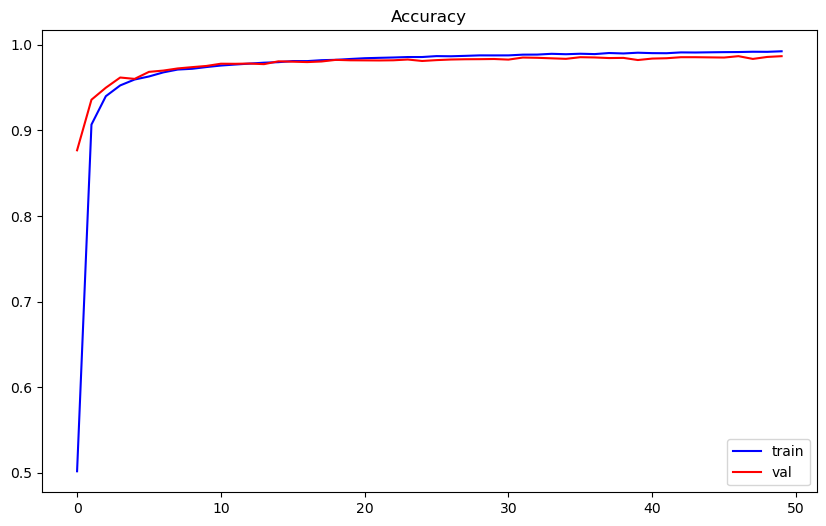

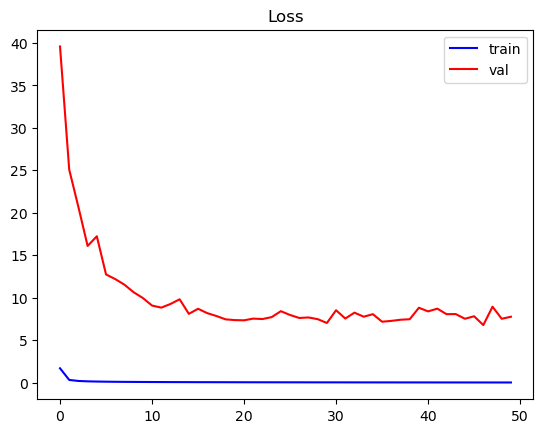

In [49]:
train_model(LeNet_model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 20ms/step


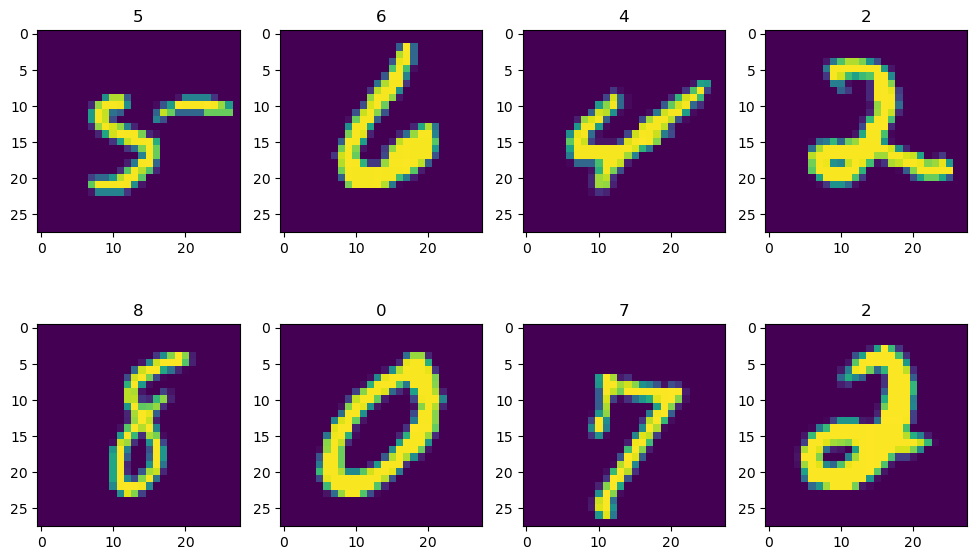

In [40]:
example(LeNet_model)

CNN0

In [50]:
def CNN0():
    model = Sequential()
    model.add(Conv2D(filters = 24, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 48, kernel_size = (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(265,activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    opt = 'adam'
    model.compile(loss = categorical_crossentropy,
                 optimizer = opt,
                 metrics= ['accuracy'])
    return model

In [51]:
CNN0_model = CNN0()
CNN0_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 14, 14, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 7, 7, 48)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 7, 7, 64)          76864     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 3, 3, 64)        

Epoch 1/30
468/468 [==============================] - 14s 28ms/step - loss: 0.1801 - accuracy: 0.9461 - val_loss: 5.3396 - val_accuracy: 0.9860
Epoch 2/30
468/468 [==============================] - 12s 26ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 8.0137 - val_accuracy: 0.9823
Epoch 3/30
468/468 [==============================] - 13s 27ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 3.2743 - val_accuracy: 0.9921
Epoch 4/30
468/468 [==============================] - 15s 33ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 4.6017 - val_accuracy: 0.9908
Epoch 5/30
468/468 [==============================] - 14s 31ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 3.6785 - val_accuracy: 0.9925
Epoch 6/30
468/468 [==============================] - 14s 29ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 4.2470 - val_accuracy: 0.9909
Epoch 7/30
468/468 [==============================] - 14s 30ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 4.5745 - val_accuracy:

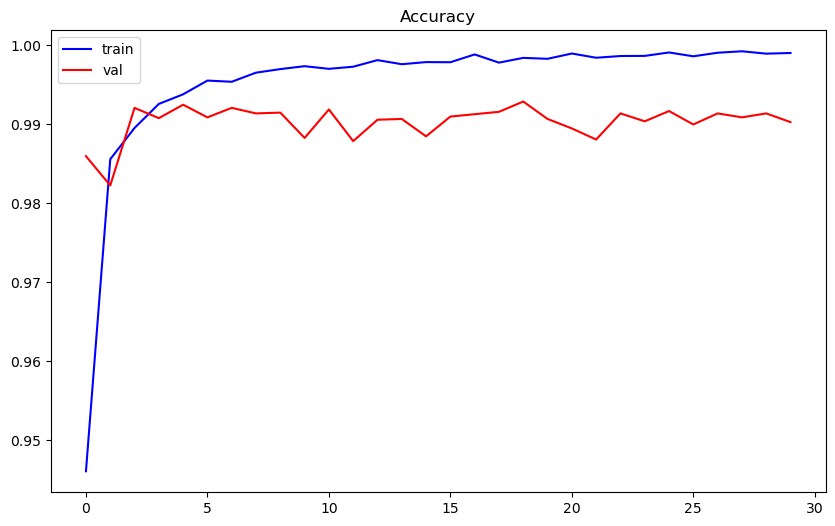

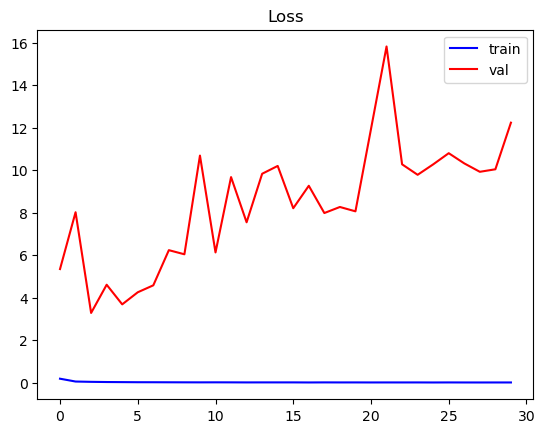

In [52]:
train_model(CNN0_model, X_train, y_train, X_test, y_test, epochs = 30)

1/1 [==============================] - 0s 20ms/step


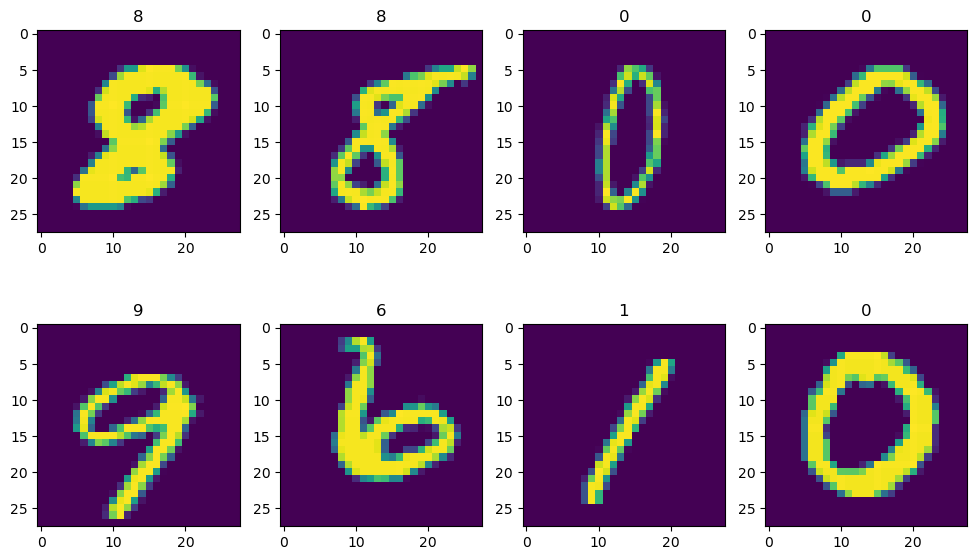

In [54]:
example(CNN0_model)

CNN1

In [55]:
def CNN1():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',input_shape= (28,28,1)))
    model.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(250, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    opt=SGD(lr=0.01)
    model.compile(loss=categorical_crossentropy,
                  optimizer=opt,metrics=['accuracy'])
    return model

In [64]:
CNN1_model = CNN1()
CNN1_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_13 (Flatten)        (None, 4096)              0         
                                                                 
 dense_25 (Dense)            (None, 250)               1024250   
                                                     

Epoch 1/50
468/468 [==============================] - 26s 54ms/step - loss: 1.9700 - accuracy: 0.4386 - val_loss: 0.7086 - val_accuracy: 0.7674
Epoch 2/50
468/468 [==============================] - 25s 53ms/step - loss: 0.7663 - accuracy: 0.7931 - val_loss: 0.4422 - val_accuracy: 0.8617
Epoch 3/50
468/468 [==============================] - 25s 53ms/step - loss: 0.5495 - accuracy: 0.8403 - val_loss: 0.3709 - val_accuracy: 0.8902
Epoch 4/50
468/468 [==============================] - 25s 53ms/step - loss: 0.4788 - accuracy: 0.8592 - val_loss: 0.3576 - val_accuracy: 0.8917
Epoch 5/50
468/468 [==============================] - 25s 53ms/step - loss: 0.4329 - accuracy: 0.8711 - val_loss: 0.3179 - val_accuracy: 0.9060
Epoch 6/50
468/468 [==============================] - 25s 52ms/step - loss: 0.4023 - accuracy: 0.8782 - val_loss: 0.3004 - val_accuracy: 0.9099
Epoch 7/50
468/468 [==============================] - 25s 54ms/step - loss: 0.3767 - accuracy: 0.8864 - val_loss: 0.2970 - val_accuracy:

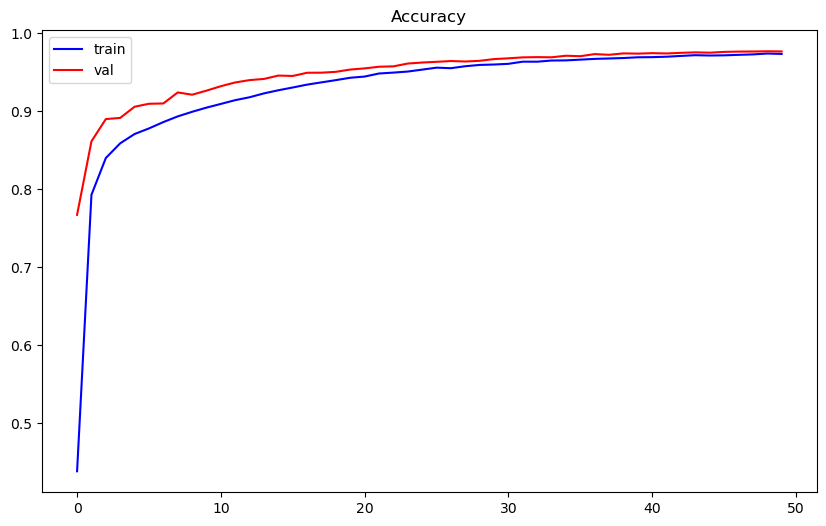

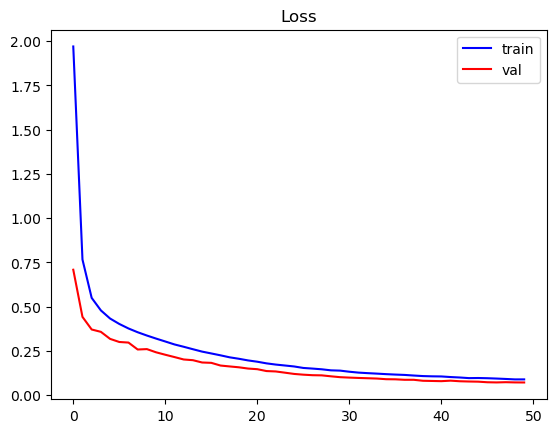

In [65]:
train_model(CNN1_model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 24ms/step


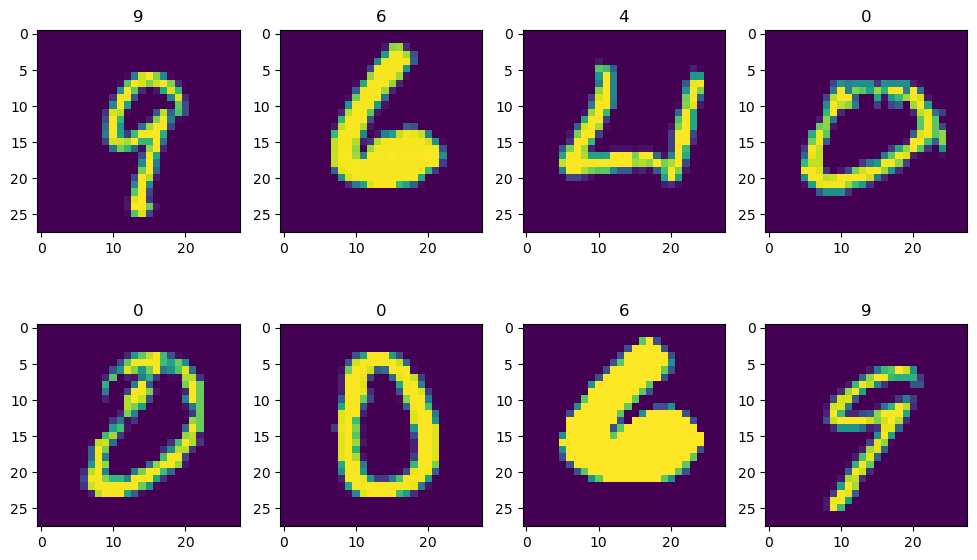

In [62]:
example(CNN1_model)